In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from process import load_trace, METRICS_CONFIGS
sns.set_theme()

In [2]:
anomaly = "bpred"
metrics_config = 0
ANOMALY_NAME = "BPRED"

In [3]:
normal_df, _ = load_trace(anomaly, "xFTx.xx", metrics_config)
stress_df, _ = load_trace(anomaly, "xDTx.xx", metrics_config)
stress_df['CONTEXT'] = ANOMALY_NAME # Forced it after e-mail with Sylvain. Still waiting for a response.

In [4]:
stress_df

,TIMESTAMP,DURATION,PROBE,KIND,LAYER,CORE,PAIR_ON,PID,L1D_CACHE,L1D_CACHE_REFILL,L1D_CACHE_WB,L2D_CACHE,L2D_CACHE_REFILL,L2D_CACHE_WB,LMC0,CONTEXT
0,744665190516,45293.846154,SENS_C1,INTERVAL,PROBE,1,63,0x00004065,1.838896e+06,1619.423077,2411.423077,10900.923077,59.461538,81.807692,0,BPRED
1,744666790081,45348.730769,SENS_C1,INTERVAL,PROBE,1,63,0x00004065,1.842002e+06,1523.500000,2256.423077,10321.384615,34.730769,79.192308,0,BPRED
2,744668390083,45582.576923,SENS_C1,INTERVAL,PROBE,1,63,0x00004065,1.846911e+06,1579.653846,2341.576923,10544.538462,57.230769,21.730769,0,BPRED
3,744669990059,45646.576923,SENS_C1,INTERVAL,PROBE,1,63,0x00004065,1.851310e+06,1565.076923,2322.076923,10500.423077,65.961538,38.730769,0,BPRED
4,744671590071,45795.846154,SENS_C1,INTERVAL,PROBE,1,63,0x00004065,1.856019e+06,1554.692308,2299.307692,10468.192308,56.307692,24.576923,0,BPRED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,751275762609,51888.423077,SENS_C1,INTERVAL,PROBE,1,63,0x00004189,2.101212e+06,1494.653846,2197.615385,11109.461538,79.115385,25.923077,0,BPRED
3886,751277362626,51212.653846,SENS_C1,INTERVAL,PROBE,1,63,0x00004189,2.074702e+06,1518.538462,2250.038462,11197.153846,89.538462,41.076923,0,BPRED
3887,751278962608,50579.538462,SENS_C1,INTERVAL,PROBE,1,63,0x00004189,2.050152e+06,1480.538462,2202.692308,10987.576923,81.115385,30.230769,0,BPRED
3888,751280562646,50100.769231,SENS_C1,INTERVAL,PROBE,1,63,0x00004189,2.028275e+06,1515.961538,2236.192308,11032.076923,68.115385,27.423077,0,BPRED


In [5]:
normal_df

,TIMESTAMP,DURATION,PROBE,KIND,LAYER,CORE,PAIR_ON,PID,L1D_CACHE,L1D_CACHE_REFILL,L1D_CACHE_WB,L2D_CACHE,L2D_CACHE_REFILL,L2D_CACHE_WB,LMC0,CONTEXT
0,25101253105,44081.000000,SENS_C1,INTERVAL,PROBE,1,63,0x000015e4,1.787578e+06,561.846154,1205.423077,4279.384615,128.461538,65.500000,0,NOSTRESS
1,25102852641,43954.192308,SENS_C1,INTERVAL,PROBE,1,63,0x000015e4,1.786813e+06,377.538462,976.307692,2993.884615,31.615385,65.769231,0,NOSTRESS
2,25104452610,44118.461538,SENS_C1,INTERVAL,PROBE,1,63,0x000015e4,1.792009e+06,408.769231,1013.538462,3176.269231,66.769231,24.115385,0,NOSTRESS
3,25106053153,44322.230769,SENS_C1,INTERVAL,PROBE,1,63,0x000015e4,1.796546e+06,386.692308,1002.692308,3137.653846,84.153846,25.115385,0,NOSTRESS
4,25107652614,44349.500000,SENS_C1,INTERVAL,PROBE,1,63,0x000015e4,1.801210e+06,401.384615,1005.461538,3157.769231,64.653846,16.461538,0,NOSTRESS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,31695535214,50311.500000,SENS_C1,INTERVAL,PROBE,1,63,0x000017ac,2.038925e+06,407.384615,1008.769231,3281.730769,89.307692,24.269231,0,NOSTRESS
3886,31697135232,49647.500000,SENS_C1,INTERVAL,PROBE,1,63,0x000017ac,2.013374e+06,420.230769,1012.730769,3307.923077,78.230769,25.653846,0,NOSTRESS
3887,31698735280,49067.461538,SENS_C1,INTERVAL,PROBE,1,63,0x000017ac,1.989678e+06,431.384615,1036.153846,3325.076923,86.923077,24.115385,0,NOSTRESS
3888,31700335284,48502.038462,SENS_C1,INTERVAL,PROBE,1,63,0x000017ac,1.967579e+06,430.115385,1039.076923,3326.961538,80.076923,24.576923,0,NOSTRESS


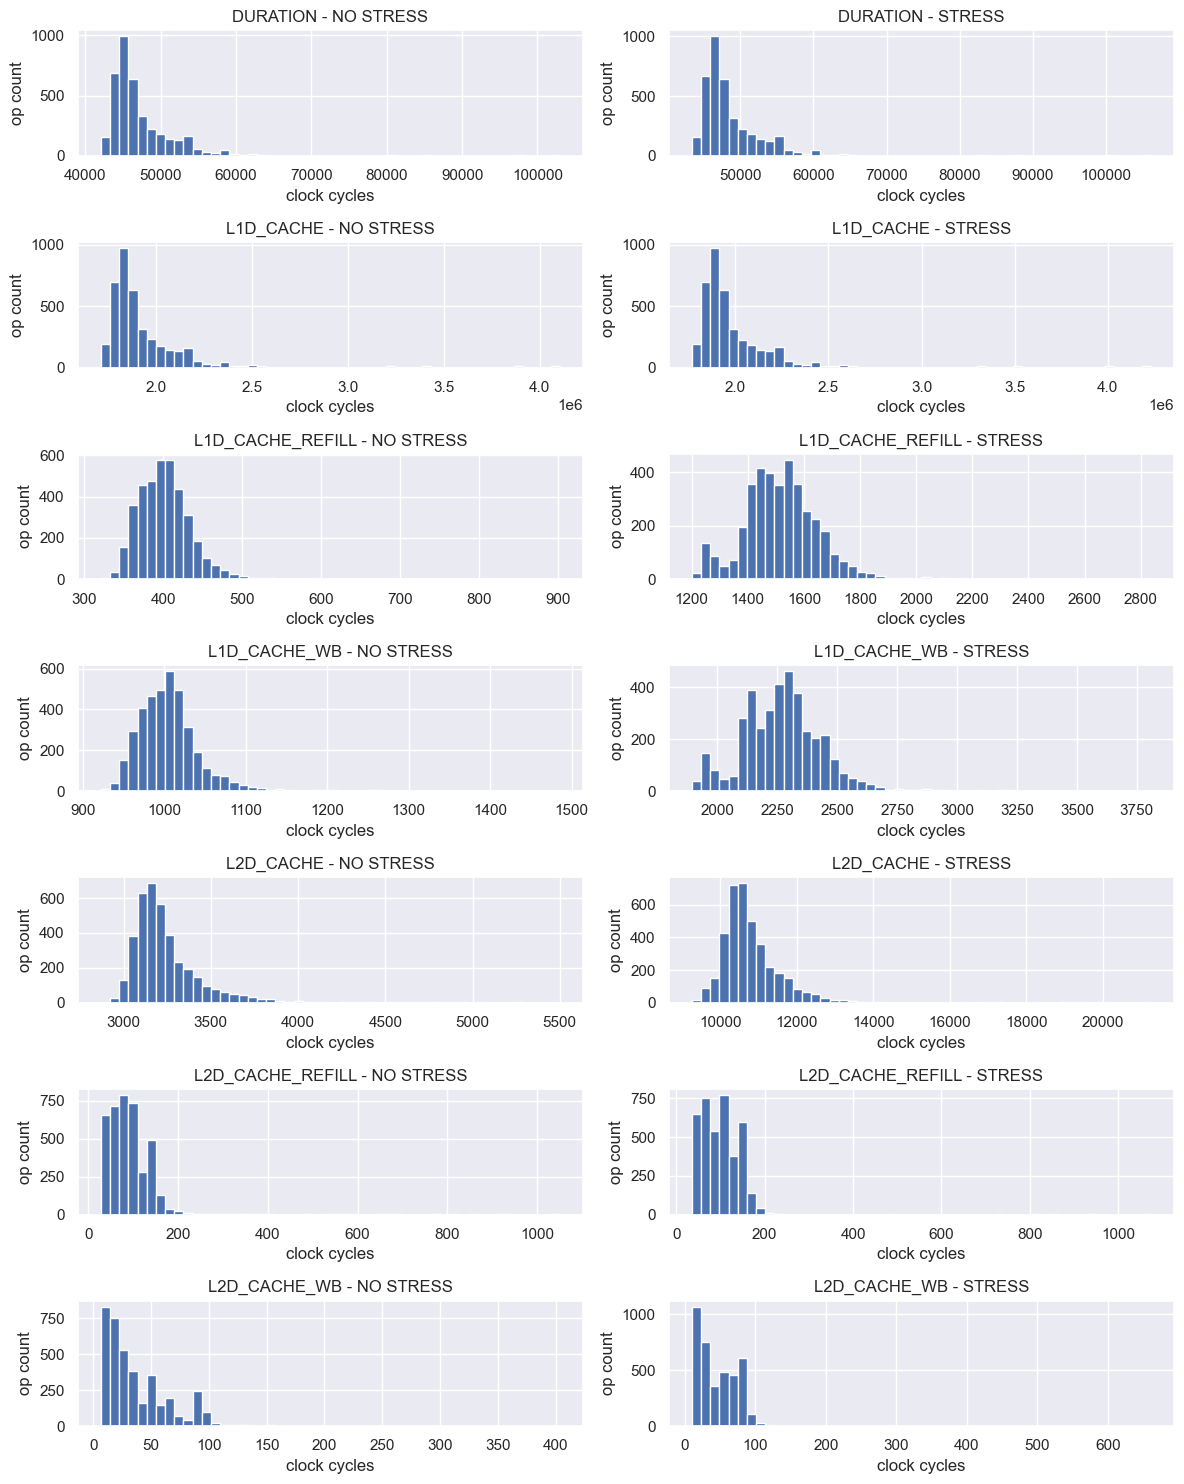

In [6]:
fig, axs = plt.subplots(7, 2, figsize=(12, 15))
for i, o in enumerate(['DURATION'] + METRICS_CONFIGS[metrics_config]):
    no_st_ax, st_ax = axs[i][0], axs[i][1]
    no_st_ax.set_title(f"{o} - NO STRESS")
    no_st_ax.set_xlabel("clock cycles")
    no_st_ax.set_ylabel("op count")
    st_ax.set_title(f"{o} - STRESS")
    st_ax.set_xlabel("clock cycles")
    st_ax.set_ylabel("op count")
    normal_df[o].hist(bins=50, ax=no_st_ax)
    stress_df[o].hist(bins=50, ax=st_ax)

plt.tight_layout()
plt.show()


In [7]:
predictors = ['L1D_CACHE_REFILL', 'L1D_CACHE_WB', 'L2D_CACHE']

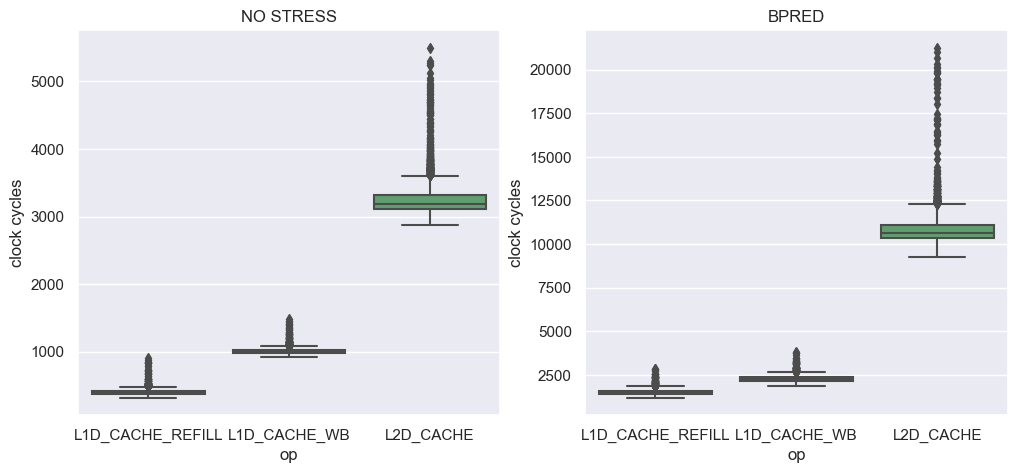

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x="variable", y="value", data=normal_df[predictors].melt(), ax=axs[0])
axs[0].set_title("NO STRESS")
axs[0].set_xlabel("op")
axs[0].set_ylabel("clock cycles")
sns.boxplot(x="variable", y="value", data=stress_df[predictors].melt(), ax=axs[1])
axs[1].set_xlabel("op")
axs[1].set_ylabel("clock cycles")
axs[1].set_title(ANOMALY_NAME)
plt.show()


In [9]:
def drop_quantile(df, q=0.1):
    cols = predictors  # one or more

    Q1 = df[cols].quantile(q)
    Q3 = df[cols].quantile(1 - q)
    IQR = Q3 - Q1

    df = df[
        ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    ]
    return df


In [10]:
normal_df = drop_quantile(normal_df)
stress_df = drop_quantile(stress_df)
merged = pd.concat([normal_df, stress_df])
model = KMeans(n_clusters=2)
model.fit(merged[predictors])


/Users/vdecaro/miniconda3/envs/avl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [13]:
# Depending on what cluster represents NOSTRESS and what cluster represents bpred,
# we need to swap the labels.
labels = {"NOSTRESS": 1, ANOMALY_NAME: 0}


def test_fn(test_df, model):
    results = model.predict(test_df[predictors])
    y_true = test_df["CONTEXT"].to_numpy()
    y_true = [labels[y] for y in y_true]
    y_pred = results
    print(
        "Accuracy in regime prediction:",
        f"{round(accuracy_score(y_true, y_pred) * 100, 2)}%",
    )


In [14]:
test_fn(merged, model)

Accuracy in regime prediction: 100.0%


# Test xGTx.xx: intermittent anomaly

In [15]:
test_df, _ = load_trace(anomaly, "xGTx.xx", metrics_config)

In [16]:
test_df

,TIMESTAMP,DURATION,PROBE,KIND,LAYER,CORE,PAIR_ON,PID,L1D_CACHE,L1D_CACHE_REFILL,L1D_CACHE_WB,L2D_CACHE,L2D_CACHE_REFILL,L2D_CACHE_WB,LMC0,CONTEXT
0,1551220514511,45188.692308,SENS_C1,INTERVAL,PROBE,1,63,0x000072a5,1.836485e+06,1328.269231,2087.807692,9663.230769,113.346154,81.230769,0,BPRED
1,1551222114108,45293.307692,SENS_C1,INTERVAL,PROBE,1,63,0x000072a5,1.841098e+06,1339.461538,2110.769231,9774.961538,70.038462,33.461538,0,BPRED
2,1551223714083,45525.153846,SENS_C1,INTERVAL,PROBE,1,63,0x000072a5,1.847762e+06,1391.423077,2166.230769,10283.730769,135.961538,60.884615,0,BPRED
3,1551225314117,45528.346154,SENS_C1,INTERVAL,PROBE,1,63,0x000072a5,1.850387e+06,1343.538462,2117.730769,9783.038462,55.000000,22.884615,0,BPRED
4,1551226914203,45694.307692,SENS_C1,INTERVAL,PROBE,1,63,0x000072a5,1.855778e+06,1352.500000,2117.153846,9873.461538,106.730769,32.038462,0,BPRED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,1557902819032,51822.846154,SENS_C1,INTERVAL,PROBE,1,63,0x000073e8,2.101325e+06,1544.769231,2311.346154,11109.769231,66.384615,19.769231,0,BPRED
3886,1557904419029,51109.692308,SENS_C1,INTERVAL,PROBE,1,63,0x000073e8,2.073579e+06,1517.653846,2276.576923,10866.730769,49.538462,16.346154,0,BPRED
3887,1557906019013,50507.346154,SENS_C1,INTERVAL,PROBE,1,63,0x000073e8,2.049193e+06,1486.923077,2254.538462,10799.500000,61.038462,22.192308,0,BPRED
3888,1557907619023,49919.000000,SENS_C1,INTERVAL,PROBE,1,63,0x000073e8,2.026671e+06,1489.846154,2250.807692,10660.730769,52.423077,21.038462,0,BPRED


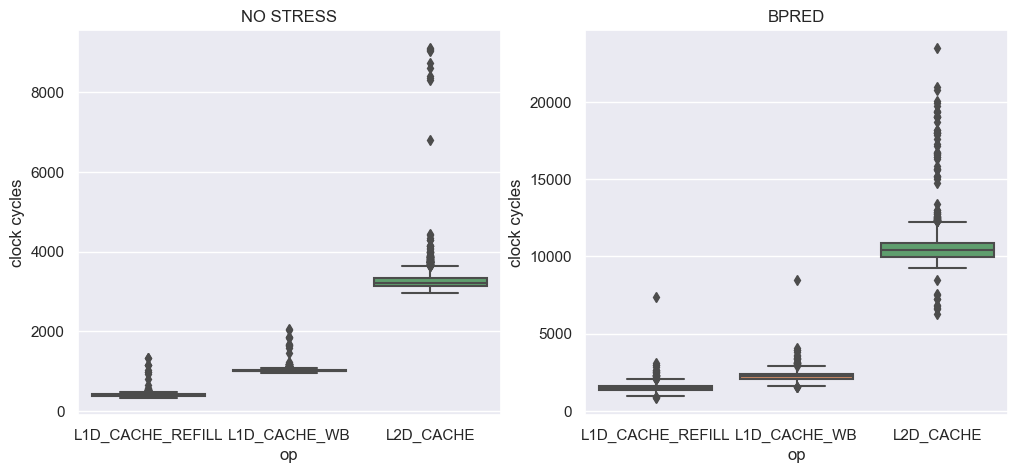

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
normal_df = test_df[test_df["CONTEXT"] == "NOSTRESS"]
stress_df = test_df[test_df["CONTEXT"] == ANOMALY_NAME]
sns.boxplot(x="variable", y="value", data=normal_df[predictors].melt(), ax=axs[0])
axs[0].set_title("NO STRESS")
axs[0].set_xlabel("op")
axs[0].set_ylabel("clock cycles")
sns.boxplot(x="variable", y="value", data=stress_df[predictors].melt(), ax=axs[1])
axs[1].set_xlabel("op")
axs[1].set_ylabel("clock cycles")
axs[1].set_title(ANOMALY_NAME)
plt.show()


In [18]:
test_fn(test_df, model)

Accuracy in regime prediction: 99.64%


In [19]:
import pickle

with open(f'models/{anomaly}.pkl', 'wb+') as f:
    pickle.dump({'headers': predictors, 'model': model}, f)